# Initial data exploration

In [86]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
#libary import
import pandas as pd
import matplotlib.pyplot as plt

from src.visualization.visualization import display_pictures, plot_data_distribution
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
data_set_train = pd.read_csv("../data/raw/emnist-digits-train.csv",header=None)
data_set_valid = pd.read_csv("../data/raw/emnist-digits-test.csv", header=None)

In [3]:
data_set_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,240000.000000,240000.0,240000.0,240000.0,240000.0,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,...,240000.0,240000.000000,240000.000000,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.000075,0.000529,0.000529,0.000542,0.000508,...,0.0,0.000138,0.000138,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872287,0.0,0.0,0.0,0.0,0.036742,0.259238,0.259238,0.257326,0.241005,...,0.0,0.067361,0.067361,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,18.000000,127.000000,127.000000,126.000000,118.000000,...,0.0,33.000000,33.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#only use a small sample of the data
sampled_data_set = data_set_train.iloc[:1]
print("sampled data shape :",sampled_data_set.shape)

sampled data shape : (1, 785)


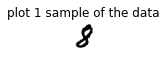

In [94]:
display_pictures(sampled_data_set,28,28,2,1)

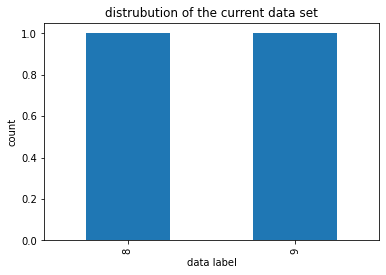

In [84]:
plot_data_distribution(sampled_data_set,0)

In [24]:
X_train = data_set_train.iloc[:,1:]
y_train = data_set_train.iloc[:,0]
y_train_OHE = pd.get_dummies(y_train)

X_valid = data_set_valid.iloc[:,1:]
y_valid = data_set_valid.loc[:,0]
y_valid_OHE = pd.get_dummies(y_valid)

print(X_train.shape)
print(y_train_OHE.shape)
print(X_valid.shape)
print(y_valid_OHE.shape)

(240000, 784)
(240000, 10)
(40000, 784)
(40000, 10)


In [32]:

model = keras.Sequential([
    layers.Dense(90, activation='relu', input_shape=[784]),
    layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 90)                70650     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                910       
Total params: 71,560
Trainable params: 71,560
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(
    X_train, y_train_OHE,
    validation_data=(X_valid, y_valid_OHE),
    batch_size=400,
    epochs=50,
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5

Epoch 1/50
600/600 [==============================] - 9s 13ms/step - loss: 11.6640 - accuracy: 0.8278 - val_loss: 0.8032 - val_accuracy: 0.9302

In [34]:
history_df.describe()

,loss,accuracy,val_loss,val_accuracy
count,50.000000,50.000000,50.000000,50.000000
mean,0.157013,0.976897,0.133402,0.972962
std,0.507706,0.014082,0.104622,0.009854
min,0.055445,0.902438,0.087680,0.930225
25%,0.059950,0.976537,0.101489,0.973950
50%,0.066976,0.981698,0.110807,0.976550
75%,0.084199,0.983760,0.120516,0.977587
max,3.646408,0.985042,0.803204,0.978875


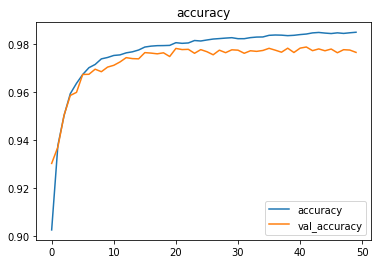

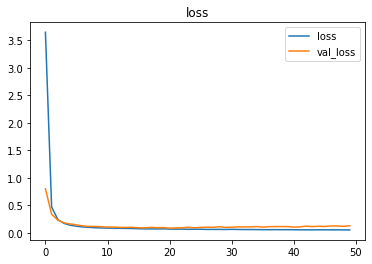

In [40]:
history_df.loc[:,['accuracy','val_accuracy']].plot(title="accuracy")
history_df.loc[:,['loss','val_loss']].plot(title="loss")
plt.show()

In [41]:
print(f"best val accuracy is {history_df['val_accuracy'].max()} and best val loss is {history_df['val_loss'].min()}")

best val accuracy is 0.9788749814033508 and best val loss is 0.08768032491207123


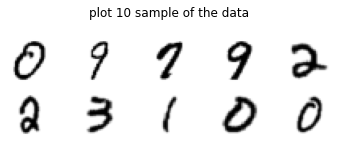

[[1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 3.1416581e-11 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [3.3229331e-22 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 2.2863999e-06]
 [9.9731308e-01 9.9999636e-01 1.0000000e+00 9.9999928e-01 9.9965394e-01
  9.9961376e-01 9.9963313e-01 1.0000000e+00 9.9999297e-01 9.9812734e-01]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 

In [124]:
display_pictures(data_set_valid.iloc[:10],28,28,2,5)
prediction = model.predict(X_valid.iloc[:10])
print(prediction)
#print(f"prediction {prediction} | real value {y_valid.iloc[0]}")